<a href="https://colab.research.google.com/drive/14FKDg_NusXwJu1Z5IProMTxQca2qV61E?usp=sharing"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [2]:
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = '/content/drive/MyDrive/Datasets/recordings.zip'
extracted_folder_path = '/content/drive/MyDrive/Datasets/recordings'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Listing the contents of the extracted folder
extracted_contents = os.listdir(extracted_folder_path)
extracted_contents.sort()
extracted_contents[:10]  # Displaying the first 10 items for brevity

['recordings']

**Dataset Used:**

Audio MNIST

https://www.kaggle.com/datasets/alanchn31/free-spoken-digits

In [5]:
# Path to the recordings folder within the extracted directory
recordings_folder_path = os.path.join(extracted_folder_path, 'recordings')

# Listing the contents of the recordings folder
recordings_contents = os.listdir(recordings_folder_path)
recordings_contents.sort()
recordings_contents[:10]  # Displaying the first 10 items for brevity

['0_george_0.wav',
 '0_george_1.wav',
 '0_george_10.wav',
 '0_george_11.wav',
 '0_george_12.wav',
 '0_george_13.wav',
 '0_george_14.wav',
 '0_george_15.wav',
 '0_george_16.wav',
 '0_george_17.wav']

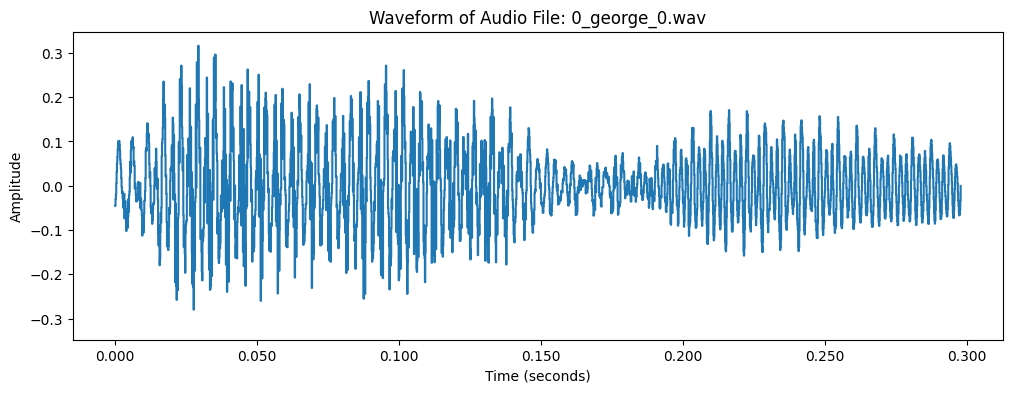

{'duration': 0.298, 'sampling_rate': 8000}

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to load and plot an audio file
def plot_audio_file(path):
    # Load the audio file
    audio, sampling_rate = librosa.load(path, sr=None)

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio, sr=sampling_rate)
    plt.title(f"Waveform of Audio File: {os.path.basename(path)}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()

    # Return audio properties
    return {
        "duration": librosa.get_duration(y=audio, sr=sampling_rate),
        "sampling_rate": sampling_rate
    }

# Analyzing the first audio file in the list
audio_file_path = os.path.join(recordings_folder_path, recordings_contents[0])
audio_properties = plot_audio_file(audio_file_path)
audio_properties

In [12]:
import wave

# Function to get basic properties of a wav file
def get_wav_properties(filepath):
    with wave.open(filepath, 'r') as wav_file:
        length = wav_file.getnframes()
        framerate = wav_file.getframerate()
        duration = length / framerate
        return {
            "duration": duration,
            "framerate": framerate,
            "nframes": length
        }

# Analyzing properties of the first few audio files
wav_properties = [get_wav_properties(os.path.join(recordings_folder_path, f)) for f in recordings_contents[:5]]
wav_properties

# Counting the total number of audio files
total_files = len(recordings_contents)

# Analyzing the distribution of digits and speakers
digit_distribution = {}
speaker_distribution = {}

for file in recordings_contents:
    parts = file.split('_')
    digit, speaker = parts[0], parts[1]
    digit_distribution[digit] = digit_distribution.get(digit, 0) + 1
    speaker_distribution[speaker] = speaker_distribution.get(speaker, 0) + 1

total_files, digit_distribution, speaker_distribution

(3000,
 {'0': 300,
  '1': 300,
  '2': 300,
  '3': 300,
  '4': 300,
  '5': 300,
  '6': 300,
  '7': 300,
  '8': 300,
  '9': 300},
 {'george': 500,
  'jackson': 500,
  'lucas': 500,
  'nicolas': 500,
  'theo': 500,
  'yweweler': 500})

In [13]:
# Checking for any potential issues with the audio files
# Issues can include files that are too short, too long, or have an inconsistent framerate

# Defining thresholds for potential issues
min_duration = 0.5  # Minimum acceptable duration in seconds
max_duration = 5.0  # Maximum acceptable duration in seconds
acceptable_framerate = 44100  # Most common framerate for audio files

# Variables to store potential issues
issues = {
    "short_files": [],
    "long_files": [],
    "inconsistent_framerate": []
}

# Analyzing each file
for file in recordings_contents:
    file_path = os.path.join(recordings_folder_path, file)
    props = get_wav_properties(file_path)
    if props["duration"] < min_duration:
        issues["short_files"].append(file)
    elif props["duration"] > max_duration:
        issues["long_files"].append(file)
    if props["framerate"] != acceptable_framerate:
        issues["inconsistent_framerate"].append(file)

# Summary of potential issues
issues_summary = {key: len(value) for key, value in issues.items()}
issues_summary

{'short_files': 2177, 'long_files': 0, 'inconsistent_framerate': 3000}

In [15]:
# Analyzing a few of the short audio files to understand their nature
short_files_sample = issues['short_files'][:5]  # Taking a sample of 5 short files

short_files_properties = [get_wav_properties(os.path.join(recordings_folder_path, f)) for f in short_files_sample]
short_files_properties

[{'duration': 0.298, 'framerate': 8000, 'nframes': 2384},
 {'duration': 0.457625, 'framerate': 8000, 'nframes': 3661},
 {'duration': 0.495375, 'framerate': 8000, 'nframes': 3963},
 {'duration': 0.498, 'framerate': 8000, 'nframes': 3984},
 {'duration': 0.488375, 'framerate': 8000, 'nframes': 3907}]

In [16]:
import numpy as np

# Function to extract MFCC features from an audio file
def extract_mfcc_features(file_path, n_mfcc=13):
    audio, sampling_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=n_mfcc)
    return mfccs

# Extracting MFCC features from a subset of audio files (for demonstration)
# Given the large number of files, we'll limit this to a small sample
sample_files = recordings_contents[:10]  # Taking a sample of 10 files
mfcc_features = {}

for file in sample_files:
    file_path = os.path.join(recordings_folder_path, file)
    mfcc_features[file] = extract_mfcc_features(file_path)

# Displaying the shape of the MFCC features for the first file
mfcc_features[sample_files[0]].shape

(13, 5)

In [17]:
import numpy as np

# Function to extract basic features from an audio file using wave
def extract_basic_features(file_path):
    with wave.open(file_path, 'r') as wav_file:
        # Reading all frames from the audio file
        signal = np.frombuffer(wav_file.readframes(wav_file.getnframes()), dtype=np.int16)

        # Basic statistical features
        features = {
            "mean": np.mean(signal),
            "std": np.std(signal),
            "max": np.max(signal),
            "min": np.min(signal)
        }
        return features

# Extracting basic features from a subset of audio files
basic_features = {}
for file in sample_files:
    file_path = os.path.join(recordings_folder_path, file)
    basic_features[file] = extract_basic_features(file_path)

# Displaying features for the first file
basic_features[sample_files[0]]

{'mean': 1.8024328859060403,
 'std': 2912.082255661006,
 'max': 10354,
 'min': -9165}

In [18]:
import numpy as np

# Function to extract basic features from an audio file using wave
def extract_basic_features(file_path):
    with wave.open(file_path, 'r') as wav_file:
        # Reading all frames from the audio file
        signal = np.frombuffer(wav_file.readframes(wav_file.getnframes()), dtype=np.int16)

        # Basic statistical features
        features = {
            "mean": np.mean(signal),
            "std": np.std(signal),
            "max": np.max(signal),
            "min": np.min(signal)
        }
        return features

# Extracting basic features from a subset of audio files
basic_features = {}
for file in sample_files:
    file_path = os.path.join(recordings_folder_path, file)
    basic_features[file] = extract_basic_features(file_path)

# Displaying features for the first file
basic_features[sample_files[0]]

{'mean': 1.8024328859060403,
 'std': 2912.082255661006,
 'max': 10354,
 'min': -9165}

In [19]:
# Preparing data for clustering
# Creating a structured array from the extracted features
features_list = []
file_names = []

for file, features in basic_features.items():
    features_list.append(list(features.values()))
    file_names.append(file)

# Converting to a numpy array for clustering
features_array = np.array(features_list)

# Displaying the shape of the array to confirm its structure
features_array.shape, file_names

((10, 4),
 ['0_george_0.wav',
  '0_george_1.wav',
  '0_george_10.wav',
  '0_george_11.wav',
  '0_george_12.wav',
  '0_george_13.wav',
  '0_george_14.wav',
  '0_george_15.wav',
  '0_george_16.wav',
  '0_george_17.wav'])

In [21]:
from sklearn.cluster import KMeans

# Selecting the number of clusters
# For demonstration, we'll start with a small number of clusters, e.g., 2
num_clusters = 2

# Applying K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(features_array)

# Getting the cluster labels for each sample
cluster_labels = kmeans.labels_

# Combining the file names with their respective cluster labels for interpretation
clustered_files = list(zip(file_names, cluster_labels))
clustered_files

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[('0_george_0.wav', 1),
 ('0_george_1.wav', 0),
 ('0_george_10.wav', 0),
 ('0_george_11.wav', 0),
 ('0_george_12.wav', 0),
 ('0_george_13.wav', 0),
 ('0_george_14.wav', 0),
 ('0_george_15.wav', 1),
 ('0_george_16.wav', 0),
 ('0_george_17.wav', 0)]

In [22]:
# Selecting a larger subset of the dataset for extended clustering analysis
larger_sample_size = 100  # Choosing 100 files for this analysis
larger_sample_files = recordings_contents[:larger_sample_size]  # Taking the first 100 files

# Extracting basic features from the larger subset
larger_sample_features = []
for file in larger_sample_files:
    file_path = os.path.join(recordings_folder_path, file)
    features = extract_basic_features(file_path)
    larger_sample_features.append(list(features.values()))

# Converting to a numpy array for clustering
larger_sample_features_array = np.array(larger_sample_features)

# Applying K-means clustering to the larger subset
# We'll use the same number of clusters (2) for consistency
kmeans_larger_sample = KMeans(n_clusters=num_clusters, random_state=0).fit(larger_sample_features_array)
cluster_labels_larger_sample = kmeans_larger_sample.labels_

# Combining the file names with their respective cluster labels for interpretation
clustered_files_larger_sample = list(zip(larger_sample_files, cluster_labels_larger_sample))
clustered_files_larger_sample[:10]  # Displaying the first 10 for brevity

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[('0_george_0.wav', 0),
 ('0_george_1.wav', 0),
 ('0_george_10.wav', 0),
 ('0_george_11.wav', 0),
 ('0_george_12.wav', 0),
 ('0_george_13.wav', 0),
 ('0_george_14.wav', 0),
 ('0_george_15.wav', 0),
 ('0_george_16.wav', 0),
 ('0_george_17.wav', 0)]

In [23]:
# Characterizing and analyzing the clusters

# Calculating the average features for each cluster
cluster_averages = {cluster: {"mean": 0, "std": 0, "max": 0, "min": 0, "count": 0} for cluster in range(num_clusters)}

for features, cluster_label in zip(larger_sample_features, cluster_labels_larger_sample):
    cluster_averages[cluster_label]["mean"] += features[0]
    cluster_averages[cluster_label]["std"] += features[1]
    cluster_averages[cluster_label]["max"] += features[2]
    cluster_averages[cluster_label]["min"] += features[3]
    cluster_averages[cluster_label]["count"] += 1

# Averaging the feature values
for cluster in cluster_averages:
    cluster_averages[cluster]["mean"] /= cluster_averages[cluster]["count"]
    cluster_averages[cluster]["std"] /= cluster_averages[cluster]["count"]
    cluster_averages[cluster]["max"] /= cluster_averages[cluster]["count"]
    cluster_averages[cluster]["min"] /= cluster_averages[cluster]["count"]

# Cluster distribution
cluster_distribution = {cluster: cluster_averages[cluster]["count"] for cluster in cluster_averages}

cluster_averages, cluster_distribution

({0: {'mean': -0.2745958856611652,
   'std': 2466.1438662706473,
   'max': 10312.266666666666,
   'min': -10447.64,
   'count': 75},
  1: {'mean': 0.2747746220492602,
   'std': 4180.928637507827,
   'max': 19155.92,
   'min': -18563.2,
   'count': 25}},
 {0: 75, 1: 25})

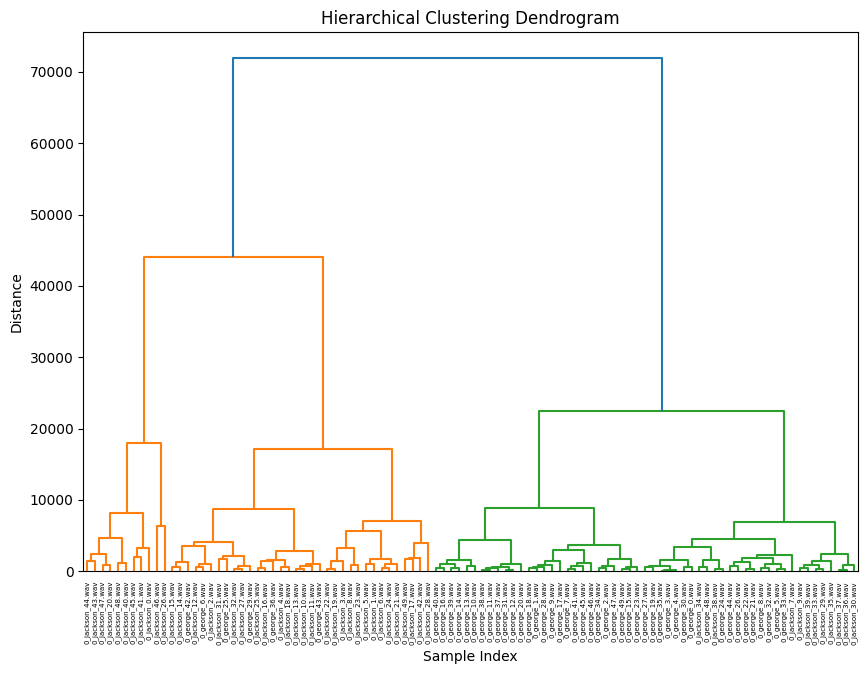

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Using Hierarchical clustering
linked = linkage(larger_sample_features_array, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=larger_sample_files,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster

# Choosing a distance threshold for clustering
# For this demonstration, we'll choose a threshold that results in a similar number of clusters to our K-means approach
distance_threshold = 15000  # This threshold can be adjusted based on the dendrogram

# Assigning clusters based on the chosen threshold
clusters_hierarchical = fcluster(linked, distance_threshold, criterion='distance')

# Combining file names with their respective cluster labels
hierarchical_clustered_files = list(zip(larger_sample_files, clusters_hierarchical))

# Characterizing the clusters
cluster_characteristics = {}
for file, cluster in hierarchical_clustered_files:
    if cluster not in cluster_characteristics:
        cluster_characteristics[cluster] = {"files": [], "count": 0}
    cluster_characteristics[cluster]["files"].append(file)
    cluster_characteristics[cluster]["count"] += 1

cluster_characteristics

{1: {'files': ['0_george_0.wav',
   '0_george_19.wav',
   '0_george_21.wav',
   '0_george_22.wav',
   '0_george_24.wav',
   '0_george_26.wav',
   '0_george_27.wav',
   '0_george_3.wav',
   '0_george_30.wav',
   '0_george_32.wav',
   '0_george_33.wav',
   '0_george_35.wav',
   '0_george_4.wav',
   '0_george_44.wav',
   '0_george_48.wav',
   '0_george_5.wav',
   '0_george_8.wav',
   '0_jackson_29.wav',
   '0_jackson_30.wav',
   '0_jackson_33.wav',
   '0_jackson_34.wav',
   '0_jackson_35.wav',
   '0_jackson_36.wav',
   '0_jackson_37.wav',
   '0_jackson_38.wav',
   '0_jackson_39.wav',
   '0_jackson_7.wav',
   '0_jackson_9.wav'],
  'count': 28},
 2: {'files': ['0_george_1.wav',
   '0_george_10.wav',
   '0_george_11.wav',
   '0_george_12.wav',
   '0_george_13.wav',
   '0_george_14.wav',
   '0_george_15.wav',
   '0_george_16.wav',
   '0_george_17.wav',
   '0_george_18.wav',
   '0_george_2.wav',
   '0_george_20.wav',
   '0_george_23.wav',
   '0_george_28.wav',
   '0_george_31.wav',
   '0_georg

In [27]:
# Analyzing the content of each cluster
cluster_content_analysis = {}

for cluster_number, cluster_info in cluster_characteristics.items():
    cluster_content_analysis[cluster_number] = {
        "digit_distribution": {},
        "speaker_distribution": {}
    }
    for file in cluster_info["files"]:
        digit, speaker = file.split('_')[0], file.split('_')[1]
        cluster_content_analysis[cluster_number]["digit_distribution"][digit] = \
            cluster_content_analysis[cluster_number]["digit_distribution"].get(digit, 0) + 1
        cluster_content_analysis[cluster_number]["speaker_distribution"][speaker] = \
            cluster_content_analysis[cluster_number]["speaker_distribution"].get(speaker, 0) + 1

cluster_content_analysis

{1: {'digit_distribution': {'0': 28},
  'speaker_distribution': {'george': 17, 'jackson': 11}},
 2: {'digit_distribution': {'0': 27}, 'speaker_distribution': {'george': 27}},
 4: {'digit_distribution': {'0': 20},
  'speaker_distribution': {'george': 6, 'jackson': 14}},
 6: {'digit_distribution': {'0': 9}, 'speaker_distribution': {'jackson': 9}},
 3: {'digit_distribution': {'0': 14}, 'speaker_distribution': {'jackson': 14}},
 5: {'digit_distribution': {'0': 2}, 'speaker_distribution': {'jackson': 2}}}

In [28]:
# Analyzing the content of each cluster
cluster_content_analysis = {}

for cluster_number, cluster_info in cluster_characteristics.items():
    cluster_content_analysis[cluster_number] = {
        "digit_distribution": {},
        "speaker_distribution": {}
    }
    for file in cluster_info["files"]:
        digit, speaker = file.split('_')[0], file.split('_')[1]
        cluster_content_analysis[cluster_number]["digit_distribution"][digit] = \
            cluster_content_analysis[cluster_number]["digit_distribution"].get(digit, 0) + 1
        cluster_content_analysis[cluster_number]["speaker_distribution"][speaker] = \
            cluster_content_analysis[cluster_number]["speaker_distribution"].get(speaker, 0) + 1

cluster_content_analysis

{1: {'digit_distribution': {'0': 28},
  'speaker_distribution': {'george': 17, 'jackson': 11}},
 2: {'digit_distribution': {'0': 27}, 'speaker_distribution': {'george': 27}},
 4: {'digit_distribution': {'0': 20},
  'speaker_distribution': {'george': 6, 'jackson': 14}},
 6: {'digit_distribution': {'0': 9}, 'speaker_distribution': {'jackson': 9}},
 3: {'digit_distribution': {'0': 14}, 'speaker_distribution': {'jackson': 14}},
 5: {'digit_distribution': {'0': 2}, 'speaker_distribution': {'jackson': 2}}}

In [29]:
# Statistical Analysis of Clusters - Basic Audio Features
cluster_stats_analysis = {cluster: {"mean": [], "std": [], "max": [], "min": []} for cluster in cluster_characteristics}

for cluster, cluster_info in cluster_characteristics.items():
    for file in cluster_info["files"]:
        # Finding the index of the file in the larger sample to get its features
        file_index = larger_sample_files.index(file)
        features = larger_sample_features_array[file_index]
        cluster_stats_analysis[cluster]["mean"].append(features[0])
        cluster_stats_analysis[cluster]["std"].append(features[1])
        cluster_stats_analysis[cluster]["max"].append(features[2])
        cluster_stats_analysis[cluster]["min"].append(features[3])

# Calculating average values for each feature in each cluster
for cluster in cluster_stats_analysis:
    for feature in cluster_stats_analysis[cluster]:
        cluster_stats_analysis[cluster][feature] = np.mean(cluster_stats_analysis[cluster][feature])

cluster_stats_analysis

{1: {'mean': -0.16876609596093273,
  'std': 2558.777926350916,
  'max': 10401.035714285714,
  'min': -11099.714285714286},
 2: {'mean': -0.4039878303132852,
  'std': 1877.0579593412267,
  'max': 7720.888888888889,
  'min': -7822.185185185185},
 4: {'mean': -0.24807846596112865,
  'std': 3131.722156512985,
  'max': 13686.35,
  'min': -13079.1},
 6: {'mean': 0.22557246252477478,
  'std': 4534.4436285464935,
  'max': 20791.666666666668,
  'min': -20984.11111111111},
 3: {'mean': 0.261546538663488,
  'std': 3908.274511078048,
  'max': 17070.714285714286,
  'min': -15494.142857142857},
 5: {'mean': 0.5887809236098505,
  'std': 4498.69006284228,
  'max': 26391.5,
  'min': -29152.5}}